# Исследование успешности игр

## Оглавление

1. [Введение](#intro)
2. [Открытие данных](#open)
3. [Предобработка данных](#preprocessing)
    1. [Обработка названий столбцов](#columns)
    2. [Изменение типов данных](#types)
    3. [Обработка пропусков](#nulls)
    4. [Обработка дубликатов](#duplicates)
    5. [Суммирование продаж во всех регионах](#all_sales)
4. [Исследовательский анализ данных](#analysis)
    1. [Анализ количества игр, выпускаемых в разные годы](#count_by_year)
    2. [Анализ количества выпускаемых игр на самых зарабатываемых платформах](#count_by_platform)
    3. [Выбор актуального периода для анализа прогноза на 2017 год](#period)
    4. [Поиск потенциально прибыльных платформ](#potential_platforms)
    5. [Анализ глобальных продаж в разбивке по платформам](#sales_by_platforms)
    6. [Анализ влияния отзывов пользователей и критиков на продажи](#sales_by_scores)
    7. [Анализ общего распределения игр по жанрам](#games_by_genres)
5. [Определение портрета пользователя для каждого региона](#profile)
    1. [Анализ самых популярных платформ](#popular_platforms)
    2. [Анализ самых популярных жанров](#popular_genres)
    3. [Анализ влияния рейтинга ESRB на продажи](#sales_by_rating)
6. [Проверка гипотез](#hypothesis)
    1. [Сравнение пользовательских рейтингов платформ Xbox One и PC](#check_platforms)
    2. [Сравнение пользовательских рейтингов жанров Action и Sports](#check_genres)
7. [Общий вывод](#total)

## Введение <a id="intro"/>

Задача: Выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании интернет-магазина компьютерных игр на 2017-й год.

Описание данных: Из открытых источников доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные за 2016 год могут быть неполными.

Описание датасета:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие данных <a id="open"/>

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Зададим необходимые константы.

In [2]:
# список часто встречающихся возрастных рейтингов ESRB по убыванию
RATING_TYPES = ['M', 'T', 'E10+', 'E']

Откроем файл с данными.

In [3]:
data = pd.read_csv('data.csv')

Выведем первые 10 строк и общую информацию о датасете.

In [4]:
display(data.head(10))
# используем all, чтобы показать все столбцы
data.describe(include='all').T

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
Other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сразу видим, что в данных есть пропуски, и некоторые аномальные значения (например, `tbd` в числовом столбце `User_score`). Изучим и обработаем их на следующем этапе.

## Предобработка данных <a id="preprocessing"/>

### Обработка названий столбцов <a id="columns">

Для удобства работы со столбцами стоит привести их названия к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()

### Изменение типов данных <a id="types">

Проверим, какие типы данных есть в текущем датасете.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для начала обработаем аномальные строковые значения `tbd` в столбце с оценками пользователей `user_score`, чтобы оставить в нем только числовые значения. Скорее всего, оно означает `to be determined` (значения будут объявлены позже). Так как на данный момент ожидаемых значений нет, то можем заменить их пропусками.

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

Можно было бы изменить тип данных в столбце `year_of_release` с вещественного на целый числовой. Но пока в нем присутствуют пустые значения `NaN`, которые имеют вещественный тип, изменить тип данных на целый не можем. Обработаем пропуски в нем позже.

В столбцах с числовыми значениями (`year_of_release`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critic_score`, `user_score`) используется тип данных со слишком большим диапазоном допустимых значений. Можно заменить тип с `float64` на `float16` в них, чтобы сэкономить память.

In [8]:
# выносим в список столбцы, которым нужно поменять тип
columns = ['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']

data.loc[:, columns] = data.loc[:, columns].astype('float16')

### Обработка пропусков <a id="nulls">

Посмотрим, какой процент пропущенных значений во всех столбцах.

In [9]:
data.isnull().sum()*100/len(data)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Пропуски присутствуют в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. Попробуем обработать их.

Но для начала посмотрим, какие значения записаны в столбце `name`. Важно, чтобы названия игр в этом столбце были записаны правильно без лишних символов, так как он очень сильно поможет в заполнении пропусков в дальнейшем.

In [10]:
# сортируем, чтобы отобразить начало и конец возможных значений
print(data['name'].sort_values().unique()[:20])
print(data['name'].sort_values().unique()[-20:])

[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest"
 ' Haikyu!! Cross Team Match!' ' Tales of Xillia 2' "'98 Koshien"
 '.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 '.hack//G.U. Vol.2//Reminisce (jp sales)' '.hack//G.U. Vol.3//Redemption'
 '.hack//Infection Part 1' '.hack//Link' '.hack//Mutation Part 2'
 '.hack//Outbreak Part 3' '.hack//Quarantine Part 4: The Final Chapter'
 '.hack: Sekai no Mukou ni + Versus' '007 Racing' '007: Quantum of Solace'
 '007: The World is not Enough' '007: Tomorrow Never Dies']
['ef - a fairy tale of the two.' 'everGirl'
 'futureU: The Prep Game for SAT' 'htoL#NiQ: The Firefly Diary' 'iCarly'
 'iCarly 2: iJoin The Click!' 'inFAMOUS' 'inFAMOUS 2'
 'inFAMOUS: Second Son' "nail'd" 'pro evolution soccer 2011'
 'th!nk Logic Trainer' 'thinkSMART' 'thinkSMART FAMILY!'
 'thinkSMART: Chess for Kids' 'uDraw Studio'
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!' nan]


Названия некоторых игр начинаются с пробела. Уберем его из начала названий, чтобы не искажать дальнейший анализ.

In [11]:
data['name'] = data['name'].str.lstrip()

С остальными значениями, кажется, все в порядке. Названия игр могут начинаться с маленьких букв или некоторых символов (например, с точки).

#### Заполнение пропусков в названиях игр и жанрах

Посмотрим данные в строках с пустыми названиями игр.

In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.780273,0.529785,0.000000,0.080017,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.000000,0.000000,0.029999,0.000000,NaN,NaN,NaN


В строках без названий игры также отсутствует жанр, оценка критиков, оценка пользователей и рейтинг. Пропуски в данных значениях мы вряд ли сможем адекватно заполнить. Предлагаю удалить эти строки. Они занимают около 0.01% от всей выборки, поэтому на анализе это не должно сказаться.

In [13]:
data = data.dropna(subset=['name', 'genre'])

#### Заполнение пропусков в годах выпуска

Пропущенные значения в столбце `year_of_release` можно заполнить по году выпуска этой же игры на других платформах. Некоторые игры могли портировать на другие платформы в разные годы. Поэтому предлагаю ориентироваться на последний год выпуска игры из всех имеющихся платформ, если таких будет несколько.

In [14]:
def fill_year_by_name(row):
    '''
    фунция принимает: строку из датасета
    функция возвращает: максимальный год выпуска у игр с таким же названием, либо пропуск, если игры не найдены
    '''
    # генерируем Series с известными годами выпуска игры с одинаковым названием
    # и получаем из него последний год выпуска
    return data[data['name'] == row['name']]['year_of_release'].dropna().max()

# заполняем год выпуска по макисмальному у игр с таким же названием на других платформах
data.loc[
    data['year_of_release'].isna(), 'year_of_release'
] = data.loc[data['year_of_release'].isna()].apply(fill_year_by_name, axis=1)

Проверим, остались ли еще пропуски, и какие названия игр они содержат.

In [15]:
# сортируем по алфавиту для удобства
data[data['year_of_release'].isna()]['name'].sort_values().unique()

array(['Action Man-Operation Extreme', 'Advance Wars: Days of Ruin',
       'Adventure', 'Agarest Senki: Re-appearance', 'Air-Sea Battle',
       'Alex Rider: Stormbreaker', 'All-Star Baseball 2005',
       'Alone in the Dark: The New Nightmare',
       'Atsumare! Power Pro Kun no DS Koushien',
       'B.L.U.E.: Legend of Water', 'Backbreaker', 'Beyond the Labyrinth',
       'Big Beach Sports 2', 'Bikkuriman Daijiten', 'Breakaway IV',
       'Build-A-Bear Workshop: Friendship Valley',
       'Charm Girls Club: My Fashion Mall',
       'Charm Girls Club: My Fashion Show', 'Chou Soujuu Mecha MG',
       'Circus Atari', 'Clockwork Empires', 'Combat',
       'Combat Elite: WWII Paratroopers',
       'Combat Wings: The Great Battles of WWII',
       "Cubix Robots for Everyone: Clash 'n' Bash",
       'DanceDanceRevolution II', 'Demon Chaos',
       'Disgaea 3: Absence of Detention',
       "Disney's Cinderella: Magical Dreams", 'Donkey Kong Land III',
       'Dragon Ball Z: Budokai Tenkaich

В оставшемся списке есть несколько игр с годом в конце названия, например `wwe Smackdown vs. Raw 2006` или `Triple Play 99`. Чаще всего такие игры выпускают годом ранее. Заполним пропуски в годах выпуска подобных игр, уменьшив год в их названии на 1.

In [16]:
def fill_year_by_year_in_name(row):
    '''
    функция принимает: строку из датасета
    функция возвращает: предыдущий год выпуска перед годом в названии игры, либо текущее значение, если год отсутствует в названии
    '''
    # если в конце названия присутствует год, прописанный целиком, то заполним год выпуска этим годом минус 1
    if row['name'][-4:].isdigit():
        return int(row['name'][-4:]) - 1
    # если в конце присутствует год, прописанный только 2 цифрами и относится к 1990-м годам, то заполним им - 1
    if row['name'][-2:].isdigit():
        if int(row['name'][-2:]) >= 90:
            return int(row['name'][-2:]) + 1900 - 1
    # если года в названии нет, то ничего не меняем
    return row['year_of_release']

# отправляем в функцию только игры с 2 цифрами на конце
data.loc[
    (data['year_of_release'].isna()) & (data['name'][-2:].str.isdigit()), 'year_of_release'
] = data.loc[
    (data['year_of_release'].isna()) & (data['name'][-2:].str.isdigit())
].apply(fill_year_by_year_in_name, axis=1)

В списке есть несколько версий игр, выпущенных для определенных стран, например `Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)`. Заполним пропуски для них годом выпуска глобальной версии игры с таким же названием (без указания версии в скобках, например `(JP sales)`) на такой же платформе, если она есть.

In [17]:
def fill_year_by_other_countries(row):
    '''
    функция принимает: строку из датасета
    функция возвращает: год выпуска игр с таким же названием без указания страны, либо пропуск, если другие игры не найдены
    '''
    # запомнили проверяемое название игры, чтобы удобнее читать формулу ниже
    check_name = row['name'][:(row['name'].find('(')-1)]
    # присваиваем последний год выпуска игры с одинаковым названием без скобок и на одинаковой платформе
    return data[
        (data['name'].str.startswith(check_name)) & 
        ~(data['name'].str.endswith(')')) & 
        (data['platform'] == row['platform'])
    ]['year_of_release'].max()

# отправляем в функцию только игры со скобками в названии
data.loc[
    (data['year_of_release'].isna()) & (data['name'].str.endswith(')')), 'year_of_release'
] = data.loc[
    (data['year_of_release'].isna()) & (data['name'].str.endswith(')'))
].apply(fill_year_by_other_countries, axis=1)

В списке есть определенные части игры, например `Yakuza 4`. Части игры выпускаются по порядку. Поэтому, например, если известны годы выпуска 3 и 5 частей игры, то можно предположить, что 4 часть была выпущена в один из годов между ними. Заполним пропуски для таких игр средним годом выпуска между ближайшими частями. Платформу здесь учитывать не будем, так как некоторые новые части игры могли выпускаться на другой более популярной в определенный год платформе.

In [18]:
def get_check_list(check_name):
    '''
    функция принимает: проверяемое название серии игры
    функция возвращает: список полных названий всех частей проверяемой игры
    '''
    return data[data['name'].str.startswith(check_name)]['name'].unique()

def get_check_name_and_list(part, name):
    '''
    функция принимает: часть и название игры
    функция возвращает: проверяемое название серии игры, список полных названий всех ее частей
    '''
    check_name = name.partition(part)[0][:-1]
    return check_name, get_check_list(check_name)

def get_prev_and_last_part_name(part, name):
    '''
    функция принимает: часть и название игры
    функция возвращает: полные названия предыдыщей и следующей частей игры
    '''
    # запомним проверяемое название серии игры и список полных названий всех ее частей
    check_name, check_list = get_check_name_and_list(part, name)
    
    # сначала запоминаем короткое название ближайших частей без доп. описания
    
    # если часть вторая, то названием предыдущей части считаем название без номера
    if (part == '2') or (part == 'II'):
        prev_part = check_name
    # если часть описана числом, то название предыдущей части будет с номером на 1 меньше
    elif part.isdigit():
        prev_part = check_name + ' ' + str(int(part)-1)
    # если часть прописана римской цифрой III, то название предыдущей части будет с римской II
    else:
        prev_part = check_name + ' II'
    
    # если номер части числовой, то название следующей части будет с номером на 1 больше
    if part.isdigit():
        last_part = check_name + ' ' + str(int(part)+1)
    # если часть прописана римской цифрой II, то название следующей будет с римской III
    elif part == 'II':
        last_part = check_name + ' III'
    # если часть прописана римской цифрой III, то название следующей будет с римской IV
    else:
        last_part = check_name + ' IV'

    # если не найдем названия ближайших частей, то они будут пустыми
    prev_part_name = None
    last_part_name = None

    # ищем в списке названий ближайшие части, если находим, то запоминаем полное название игры
    for name in check_list:
        if (
            # если предыдущая часть первая
            (prev_part == check_name) and (name == prev_part)
        ) or (
            # если предыдущая часть 2 и больше
            (prev_part != check_name) and (name.startswith(prev_part))
        ):
            prev_part_name = name                    
        if name.startswith(last_part):
            last_part_name = name
            
    return prev_part_name, last_part_name

def fill_year_by_other_parts(row, parts):
    '''
    функуия принимает: строку датасета и список возможных частей игр
    функция возвращает: год выпуска между ближайшими частями одной серии, или пропуск, если другие игры не найдены
    '''
    for part in parts:
        # если в названии игры есть проверяемый номер части
        if part in row['name']:
            # запомнили полные названия ближайших частей игры (предыдущая и следующая)
            prev_part_name, last_part_name = get_prev_and_last_part_name(part, row['name'])
            
            # если ближайшие части игры есть в датасете, то получаем средний год между ними
            if (prev_part_name is not None) and (last_part_name is not None):
                # запоминаем годы выпуска ближайших частей
                prev_year = data[data['name'] == prev_part_name]['year_of_release'].max()
                last_year = data[data['name'] == last_part_name]['year_of_release'].max()
                
                # если у ближайших частей есть год выпуска, то считаем средний между ними
                if (prev_year == prev_year) and (last_year == last_year):
                    # округляем, так как средний год может получиться не целым
                    return np.round( (prev_year + last_year) / 2)
            
            # прерываем цикл для ускорения, так как название не будет содержать других частей
            break
    return row['year_of_release']
       
# передаем в функцию встречающиеся части игр в пропущенных значениях
data.loc[
    data['year_of_release'].isna(), 'year_of_release'
] = data.loc[
    data['year_of_release'].isna()
].apply(fill_year_by_other_parts, axis=1, parts=['2', '3', '4', 'III', 'II'])

Посмотрим, остались ли пропуски в годах выпуска игр, и сколько они занимают процентов от всего датасета.

In [19]:
data['year_of_release'].isna().sum()*100/len(data)

0.8316879076168252

Пропуски еще есть, но заполнить их больше никак не можем. Так как их осталось меньше 1% от всего датасета, то предлагаю удалить их для экономии времени в дальнейшем анализе.

In [20]:
data = data.dropna(subset=['year_of_release'])

#### Заполнение пропусков в оценках критиков и пользователей

Пропущенные значения в оценках можем заполнить медианными оценками для этой же игры на других платформах. 

In [21]:
def fill_score_by_name(row, score_type):
    '''
    функция принимает: строку датасета и название столбца с оценкой
    функция возвращает: медианная оценка этой же игры на других платформах
    '''
    return data.loc[data['name'] == row['name'], score_type].dropna().median()

# запоминаем список из обрабатываемых столбцов для удобства
score_types = ['critic_score', 'user_score']

# заполняем пропуски в каждом столбце с оценками
for score_type in score_types:
    data.loc[
        data[score_type].isna(), score_type
    ] = data.loc[data[score_type].isna()].apply(fill_score_by_name, axis=1, score_type=score_type)

Пропуски в оценках остальных игр можем заполнить по медианной оценке игр такого же жанра на такой же платформе.

In [22]:
def fill_score_by_median_score(row, score_type, score_pivot_table):
    '''
    функция принимает: строка датасета, название столбца с оценкой, таблица с медианными оценками игр разных платформ и жанров
    функция возвращает: медианная оценка игр такого же жанра и платформы, либо пропуск, если оценки не найдены
    '''
    # конструкция try для обработки игр с отсутствующими оценками у игр такого же жанра и платформы
    # для них возвращаем текущее значение
    try:
        return score_pivot_table[score_type][row['genre']][row['platform']]
    except:
        return row[score_type]

# заполняем пропуски в каждом столбце с оценками
for score_type in score_types:
    # формируем сводную таблицу с медианными оценками игр разных жанров и платформ
    score_pivot_table = data.pivot_table(index=['genre', 'platform'], values=score_type, aggfunc='median')
    # заполняем пропуски в датасете
    data.loc[
        data[score_type].isna(), score_type
    ] = data.loc[data[score_type].isna()].apply(
        fill_score_by_median_score, axis=1, score_type=score_type, score_pivot_table=score_pivot_table
    )

Пропуски в оценках оставшихся игр можем заполнить по медианной оценке игр такого же жанра.

In [23]:
# заполняем пропуски в каждом столбце с оценками
for score_type in score_types:
    for genre in data['genre'].unique():
        data.loc[
            data['genre'] == genre, score_type
        ] = data.loc[data['genre'] == genre][score_type].median()

Все пропуски в оценках пользователей и критиков были заполнены. Но так как пропусков было доволько много (примерно 51-55% от всего датасета), то данные могли исказиться. Стоит учитывать это в дальнейшем анализе.

#### Заполнение пропусков в рейтинге от ESRB

Пропущенные значения в столбце `rating` можно заполнить по рейтингу этой же игры на других платформах. Если на разных платформах игре присваивали разные возрастные рейтинги, то заполним по самому часто встречающемуся из них. Если найдется одинаковое количество часто встреющихся рейтингов, то заполним по самому высокому из них.

Так как ESRB оценивает игры, которые выпускаются в США и Канаде, то пропущенные значения в играх, которые не продавались в Северной Америке, можем не заполнять.

In [24]:
def get_rating_by_check_data(value, check_data):
    '''
    функция принимает: текущее значение рейтинга и проверяемый датасет
    функция возвращает: часто встречающийся рейтинг этой же игры на других платформах, либо пропуск, если другие игры не найдены
    '''
    # запоминаем количество разных рейтингов, которые присваивали всем анализируемым играм
    # группируем по убыванию
    rating_data = check_data.groupby('rating')['rating'].count().sort_values(ascending=False)
    
    # если не нашли ни одного рейтинга, то сразу возвращаем текущее значение, для ускорения функции
    if len(rating_data.index)==0:
        return value
    # если нашли только 1 значение рейтинга, то присваиваем его
    elif len(rating_data.index)==1:
        return rating_data.index[0]

    # если рейтингов было несколько, то анализируем их

    # если есть только 1 часто встречающийся рейтинг, то присваиваем его
    if rating_data[0] > rating_data[1]:
        return rating_data.index[0]
        
    # если есть одинаковое количество нескольких часто встреющихся рейтингов, то собираем их список
    # первый элемент сразу запоминаем, и далее считаем со второго
    rating_list = [rating_data.index[0]]
    for index in range(1, len(rating_data.index)):
        # запоминаем все одинаково встречающиеся рейтинги с топовым
        if rating_data[0] == rating_data[index]:
            rating_list.append(rating_data.index[index])
        # если следующие рейтинги меньше, то прерываем цикл для ускорения
        else:
            break

    # перебираем рейтинги по убыванию возраста, и присваиваем самый высокий из имеющихся
    for rating_type in RATING_TYPES:
        if rating_type in rating_list:
            return rating_type
        
    # оставляем возврат текущего значения на случай, если строки выше ничего не вернули
    return value

def fill_rating_by_name(row):
    '''
    функция принимает: строку датасета
    функция возвращает: часто встречающийся рейтинг этой же игры на других платформах, либо пропуск, если другие игры не найдены
    '''
    return get_rating_by_check_data(row['rating'], data[data['name'] == row['name']])
    
# заполняем пропуски в рейтингах
data.loc[
    (data['rating'].isna()) & (data['na_sales']>0), 'rating'
] = data.loc[
    (data['rating'].isna()) & (data['na_sales']>0)
].apply(fill_rating_by_name, axis=1)

В датасете присутствуют разные части игр. Можем заполнить пропущенные значения в столбце `rating` по часто встречающемуся возрастному рейтингу у других игр одной серии. Разные части одной игры могут содержать уникальные имена после символа `:`, или иметь номер или год в названии. Также в названии игры в круглых скобках могут указываться отдельные версии для определенных рынков (например, `(jp sales)`).

In [25]:
def get_rating_by_check_list(value, check_list):
    '''
    функция принимает: значение рейтинга игры и список всех игр из ее серии
    функция возвращает: часто встречающийся рейтинг игр этой серии, либо пропуск, если другие игры не найдены
    '''
    return get_rating_by_check_data(value, data[data['name'].isin(check_list)])

def fill_rating_by_other_parts(row, parts):
    '''
    функция принимает: строку датасета и список проверяемых символов в названии игры для определения серии
    функция возвращает: часто встречающийся рейтинг игр этой серии, либо пропуск, если другие игры не найдены
    '''
    # сначала проверяем наличие года в конце названия игры
    if row['name'][-4:].isdigit():
        check_name = row['name'][:-5]
        # если название состоит не только из 4 цифр, то проверяем его
        if len(check_name) > 0:
            return get_rating_by_check_list(row['rating'], get_check_list(check_name))
    elif row['name'][-2:].isdigit():
        check_name = row['name'][:-3]
        return get_rating_by_check_list(row['rating'], get_check_list(check_name))

    # проверяем наличие символов нумерации или отделения части игры
    for part in parts:
        if part in row['name']:
            # запомнили проверяемое название серии игры и список полных названий всех ее частей
            check_name, check_list = get_check_name_and_list(part, row['name'])
            # если проверяемое название слишком короткое, то пропускаем его (на случай попадания не в нумерацию серии)
            if len(check_name) < 2:
                return row['rating']
            return get_rating_by_check_list(row['rating'], check_list)
        
    # возвращаем текущее значение рейтинга, если других частей не нашли
    return row['rating']

# передаем в списке
# - цифры от 2 до 9, тк первая часть не нумеруется
# - римскую цифру II (для проверки игр с II и III в названии)
# - римскую цифру IV
# - римскую цифру VI (для проверки игр с VI, VII и VIII в названии)
# римские цифры V и X не включены, тк эти символы могут часто встречаться в роли начала слова, а не номера части игры
# римская цифра IX не включена, тк таких игр нет
# - символ ":", тк некоторые части игр могут им разделяться
# - символ "(", тк некоторые части игр могли издаваться отдельно для некоторых рынков
data.loc[
    (data['rating'].isna()) & (data['na_sales']>0), 'rating'
] = data.loc[
    (data['rating'].isna()) & (data['na_sales']>0)
].apply(fill_rating_by_other_parts, axis=1, parts=[
    '2', '3', '4', '5', '6', '7', '8', '9', 'II', 'IV', 'VI', ':', '('
])

Пропуски в остальных строках можем заполнить по часто встречающемуся возрастному рейтингу у игр такого же жанра.

In [26]:
for genre in data['genre'].unique():
    # значением по умолчанию задаем NaN, на случай, если не найдем рейтингов у анализируемого жанра
    data.loc[
        (data['rating'].isna()) & (data['na_sales']>0) & (data['genre'] == genre), 'rating'
    ] = get_rating_by_check_data(np.nan, data[data['genre'] == genre])

Пропуски в рейтингах для игр, которые не выпускались в Северной Америке, можем заменить на значение `no rating`. Такие пропуски могут носить полезную информацию, например, у игр, выпускаемых для локальных рынков.

In [27]:
data.loc[data['rating'].isna(), 'rating'] = 'no rating'

#### Итоги заполнения пропусков

Проверим процент оставшихся пропусков в каждом столбце.

In [28]:
data.isna().sum()*100/len(data)

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

Вывод:

- Большинство пропусков было заполнено на основе предположений и значений похожих игр.
- Было найдено 2 строки с пустыми названиями и жанрами игр, выпущенных в 1993 на платформе `GEN`. Возможно, стоит разобраться подробнее, в чем могла быть причина потери данных. Пропуски могли носить полностью случайный характер, например, из-за человеческого фактора в этом году информация была занесена не полностью. Также характер пропусков мог быть неслучайным, например, шрифт названия игры мог быть неподдерживаемым, или ни один из известных жанров не подходил под игру. Так как значения восстановить было невозможно, пришлось удалить их из выборки.
- Было пропущено почти 270 значений годов выпуска. Характер пропусков может носить полностью случайный характер, например, также информацию могли не занести в базу данных. Или случайный, например, разработчик мог не указать год издания после выпуска игры.
- Строки с оставшимися пропусками в года выпуска были удалены для экономии времени в дальнейшем анализе, так как их осталось меньше 1% от всего датасета.
- В столбце с оценками пользователей было проставлено значение `tbd`. Оно было приравнено к пропуску, так как предположительно означает `to be determined` (значения будут объявлены позже).
- Остальные пропущенные значения в столбцах с оценками критиков и пользователей могли носить неслучайный характер, например, если игра вообще не была оценена критиками и пользователями на используемом ресурсе.
- Все пропуски в оценках пользователей и критиков были заполнены. Но так как пропусков было доволько много (примерно 51-55% от всего датасета), то данные могли исказиться. Стоит учитывать это в дальнейшем анализе.
- Так как ESRB оценивает игры, которые выпускаются в США и Канаде, то пропущенные значения в играх, которые не продавались в Северной Америке, не были заполнены.

### Обработка дубликатов <a id="duplicates">

Проверим, если в датасете явные дубликаты.

In [29]:
data.duplicated().sum()

0

Явных дубликатов в данных нет. 

При обработке пропусков были заметны игры, которые отдельно публиковались в определенных странах (например, с добавкой `(jp sales)` в названии). Объединить их показатели с аналогичной игрой, опубликованной в другой стране, не можем, так как у игр могут отличаться годы выпуска, оценки критиков или пользователей, возрастной рейтинг. Также сами игры могут отличаться, например, содержать дополнительную цензуру, или уникальные фичи. Поэтому оставим данные как есть.

### Суммирование продаж во всех регионах <a id="all_sales">

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [30]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных <a id="analysis">

### Анализ количества игр, выпускаемых в разные годы <a id="count_by_year">

Для начала посмотрим на разброс данных. Построим диаграмму размаха годов выпуска игр.

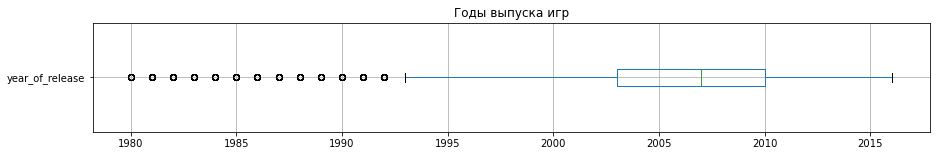

In [31]:
data.boxplot(column='year_of_release', grid=True, figsize=(15, 2), vert=False).set_title('Годы выпуска игр');

На графике видим, что до 1993 года выпускалось крайне мало игр, относительно остальной выборки. Эти данные можно отнести к выбросам. Не будем учитывать их при дальнейшем анализе текущего параметра.

Построим гистограмму, чтобы проанализировать количество выпускаемых игр в разные годы.

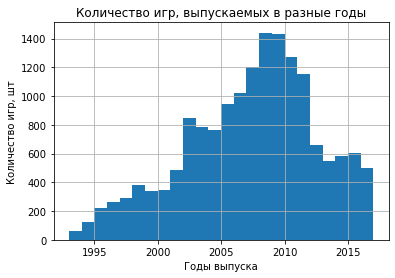

In [32]:
# количество корзин = количество исследуемых годов (1993-2016)
data['year_of_release'].hist(bins=24, grid=True, range=(1993, 2017)).set(
    xlabel='Годы выпуска', 
    ylabel='Количество игр, шт', 
    title='Количество игр, выпускаемых в разные годы');

Вывод:

- Распределение количества игр в разные годы нормальное.
- Большая часть игр была выпущена в 2007-2011 годах. 
- Пики значений в 2008-2009. Было выпщено около 1450 штук в каждый. В 2008 было чуть больше.
- До 2008 года количество игр практически равномерно растет.
- После 2010 начинается постепенный спад. А в 2012 году заметно резкое падение количества выпускаемых игр, почти в 1.5 раза, по сравнению с предыдущим годом. Тут могут быть разные причины. Возможно, активность игроков снизилась, и разработчики стали выпускать меньше игр. Возможно, уже выпущенные игры стали дольше поддерживаться на рынке, для них выпускаются новые апдейты вместо новых частей.

### Анализ количества выпускаемых игр на самых зарабатываемых платформах <a id="count_by_platform">

Найдем платформы с наибольшими суммарными продажами. Построим таблицу с рейтингом суммарных продаж на платформах.

In [33]:
# запоминаем таблицу в переменную, чтобы далее было проще брать из нее список топовых платформ
all_platforms = data.pivot_table(
    index=['platform'], values='all_sales', aggfunc='sum'
).sort_values(by='all_sales', ascending=False)

# выводим и добавляем закрашивание
all_platforms.style.background_gradient(cmap='BuGn')

,all_sales
platform,
PS2,1248.000000
X360,966.500000
PS3,936.000000
Wii,903.500000
DS,804.500000
PS,727.500000
PS4,314.250000
GBA,314.000000
PSP,293.500000


Для дальнейшего анализа предлагаю взять 6 топовых платформ с суммарными продажами больше 500 млн копий: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`. Построим графики с количеством выпущенных игр в разные годы на каждой из них.

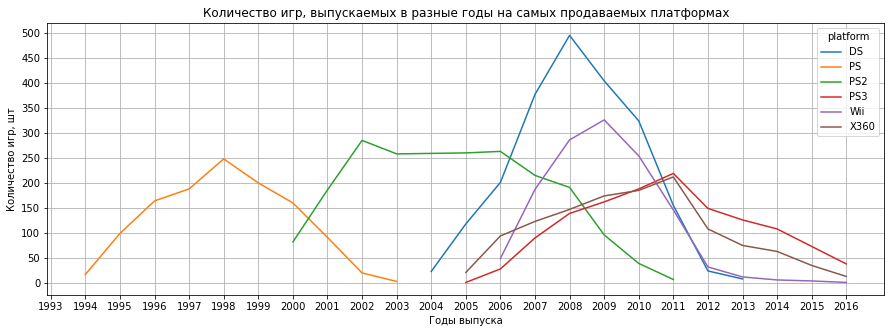

In [34]:
# запоминаем список топовых платформ
top_platforms = all_platforms.index[:6]

# рисуем график
data.query(
    '(platform.isin(@top_platforms)) and (1993 <= year_of_release <= 2016)'
).pivot_table(
    index=['year_of_release'], columns='platform', values='name', aggfunc='count'
).plot(
    grid=True, figsize=(15, 5), legend=True,
    # значения по х делаем равными всем анализируемвм годам
    xticks=[x for x in range(1993, 2017)],
    # значения по у делаем от 0 до 500 (максимальное значение) с шагом 50
    yticks=[y for y in range(0, 501, 50)]
).set(
    xlabel='Годы выпуска', 
    ylabel='Количество игр, шт', 
    title='Количество игр, выпускаемых в разные годы на самых продаваемых платформах'
);

Выводы:

- Распределение количества игр в разные годы нормальное.
- Игры для каждой платформы выпускаются примерно по 9-12 лет. В середине периода (3-7 годы) они пользуются наибольшей популярностью. Далее количество выпускаемых игр уменьшается, платформы теряют популярность.
- Пик количества выпущенных игр за 1 год присутствует на платформе `DS` в 2008 году (почти 500 игр).
- Пиковые количества выпущенных игр на других платформах:
    - На `PS` в 1998 году было выпущено примерно 250 игр.
    - На `PS2` в период 2002-2006 годов выпускалось примерно одинаковое количество игр - примерно по 260-280 штук в год. Самый пик в 2002 году, было выпущено примерно 280 игр.
    - На `Wii` в 2009 примерно 320 игр. 
    - На `PS3` и `X360` в 2011 примерно 220 и 210 игр соответственно.

### Выбор актуального периода для анализа прогноза на 2017 год <a id="period">

Чтобы спрогнозировать прогноз на 2017 год возьмем актуальный период с 2012 по 2016 год. В этом периоде значительно сократилось количество выпускаемых игр на самых популярных платформах. Так как в среднем время использования одной платформы около 10 лет с пиком в 3-7 годы, то попробуем найти новые и набирающие популярность платформы.

Также так как в графике с количеством игр, выпускаемых в разные годы на топовых платформах, было заметно падение спроса на платформы `DS`, `PS3`, `Wii`, `X360`, то можем их сразу не учитывать в анализе.

In [35]:
# запоминаем игнорируемые платформы в отдельную переменную
ignore_platforms = ['DS', 'PS3', 'Wii', 'X360']

### Поиск потенциально прибыльных платформ <a id="potential_platforms">

Построим графики с количеством выпущенных игр и суммарными продажами на разных платформах за актуальный период.

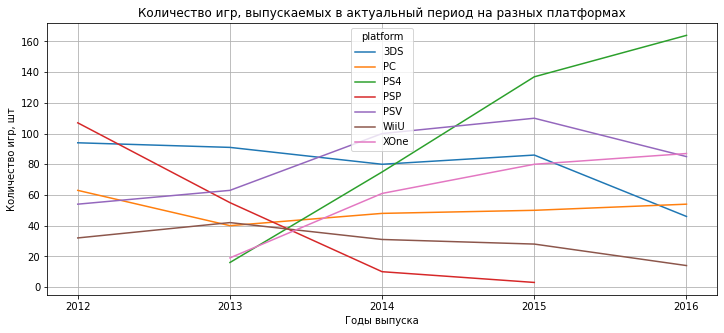

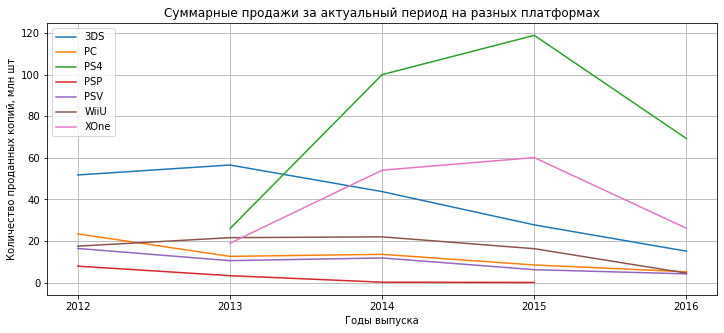

In [36]:
# выносим срез данных в отдельную переменную для удобства
actual_data = data.query('(2012 <= year_of_release <= 2016) and not (platform.isin(@ignore_platforms))')
# выносим список актуальных годов в отдельную переменную, чтобы на графике не было дробных значений годов выпуска
xticks = [2012, 2013, 2014, 2015, 2016]

# рисуем график для количества игр
ax = actual_data.pivot_table(
    index=['year_of_release'], columns='platform', values='name', aggfunc='count'
).plot(
    grid=True, figsize=(12, 5), legend=True, xticks=xticks
).set(
    xlabel='Годы выпуска', 
    ylabel='Количество игр, шт', 
    title='Количество игр, выпускаемых в актуальный период на разных платформах'
)
plt.show()

# рисуем график для суммарных продаж
# собираем график для каждой платформы по очереди, так как данные в сводную таблицу матчатся только по отдельности
# ax присваиваем None, чтобы работал сбор графиков в один (в первый по очереди график ничего не добавится)
ax = None
# сортируем список платформ, чтобы цвета линий совпадали с предыдущим графиком количества игр
for platform in sorted(actual_data['platform'].unique()):
    # переименовываем столбец со значениями, чтобы линии на графике отображали названия платформ
    ax = actual_data.query('platform == @platform').pivot_table(
        index=['year_of_release'], values='all_sales', aggfunc='sum'
    ).rename(columns={'all_sales': platform}).plot(
        grid=True, figsize=(12, 5), legend=True, xticks=xticks, ax=ax
    )
# отдельно подписываем график
ax.set(
    xlabel='Годы выпуска', 
    ylabel='Количество проданных копий, млн шт', 
    title='Суммарные продажи за актуальный период на разных платформах'
)
plt.show()

Выводы:

Количество выпущенных игр:
- За последние 5 лет игры перестали выпускать на платформах `DS`, `PSP`.
- В течение всех последних 5 лет наблюдается уменьшение количества выпускаемых игр на платформах `3DS`, `PS3`, `Wii`, `X360`.
- На платформах `PSV` и `WiiU` наблюдалось небольшое увеличение, но после 2015 и 2013 годов соответственно наблюдается уменьшение количества выпускаемых игр.
- На `PC` до 2013 года наблюдалось падение количества выпускаемых игр. Далее количество растет. Но так как рост незначительный, и количество игр, выпущенных в 2016, меньше, чем количество игр, выпущенных в 2012, то предлагаю не учитывать эту платформу как потенциально прибыльную. Тем более, что в 2016 на `PS4`, `PSV` и `XOne` игр было выпущено больше.
- Как самые потенциально прибыльные платформы можно выделить `PS4` и `XOne`. Они обе появились в 2013 году, и с тех пор показывали рост количества выпускаемых игр. Если учитывать, что платформы в среднем пользуются спросом 9-12 лет, и в 3-7 годы показывают пик количества издаваемых игр, то эти платформы могут еще несколько лет показывать хорошие результаты. Кажется, лучше запустить рекламные кампании для них.

Суммарные продажи:
- За последние годы суммарные продажи на всех платформах, кроме `PS4` и `XOne`, падали.
- `PS4` и `XOne` продали больше копий за последние 3 года.
- Лидер по продажам: `PS4`. За полный 2015 год на нем было продано около 120 млн копий. Что в 2 раза больше, чем на `XOne`.
- Количество копий на лидирующих платформах за последний 2016 год чуть ниже, чем в 2015. Это может быть связано с тем, что данные за 2016 неполные. Так как в этот год на этих платформах было выпущено больше игр, чем в предыдущий, то, скорее всего, по итогам года суммарное количество продаж в нем тоже будет больше предыдущего.
- Суммарное количество продаж подтверждает выбор `PS4` и `XOne` как потенциально прибыльные платформы. В приоритете стоит рассмотреть `PS4`.

### Анализ глобальных продаж в разбивке по платформам <a id="sales_by_platforms">

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам за актуальный период.

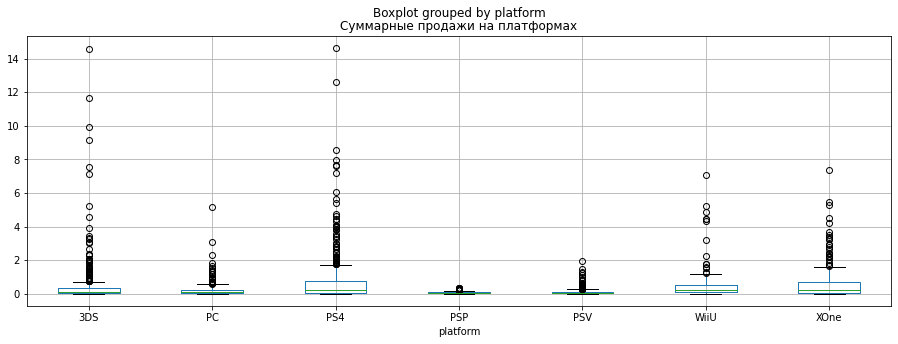

In [37]:
actual_data.boxplot(
    by='platform', column='all_sales', grid=True, figsize=(15, 5), vert=True
).set(title='Суммарные продажи на платформах');

На графиках видим много аномальных значений с количеством проданных копий больше 2 млн у большинства платформ. Построим диаграммы без этих выбросов.

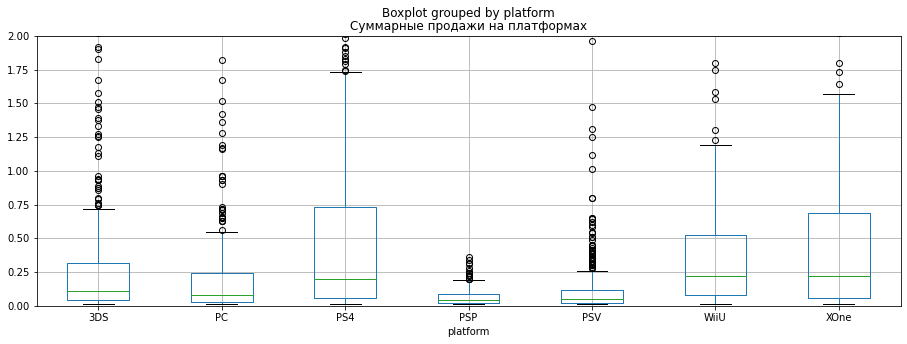

In [38]:
actual_data.boxplot(
    by='platform', column='all_sales', grid=True, figsize=(15, 5), vert=True
).set(title='Суммарные продажи на платформах', ylim=[0, 2]);

Вывод:

- Хуже всего продавались игры на платформах `PSP` и `PSV`. Часто встречающееся количество проданных копий на них меньше 250 тысяч.
- Лучше всего продавались игры на платформе `PS4`. Часто встречающеемя количество проданных копий на них меньше 1.75 млн.
- Чуть хуже продавались на платформах `Wii` и `XOne`. Часто встречающееся количество проданных копий на каждой из них меньше меньше 1.6 млн.

### Анализ влияния отзывов пользователей и критиков на продажи <a id="sales_by_scores">

Построим диаграмму рассеяния зависимости продаж от отзывов для платформ, выбранных ранее как потенциально популярные - `PS4` и `XOne`. Тем более, что на них продавалось больше всего копий за актуальный период. Также для более точного анализа предлагаю добавить платформу `3DS` как еще одну из самых хорошо продаваемых в актуальный период.

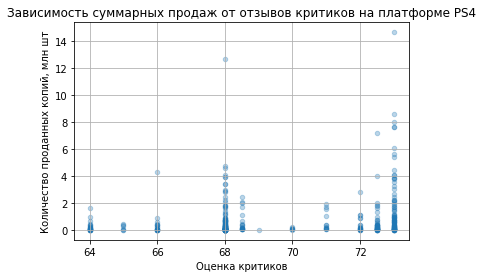

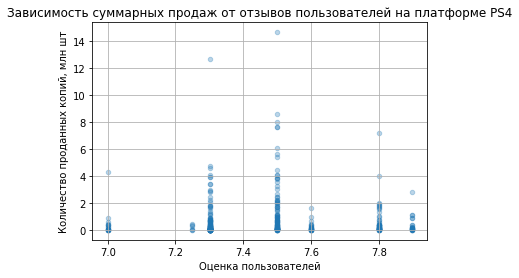

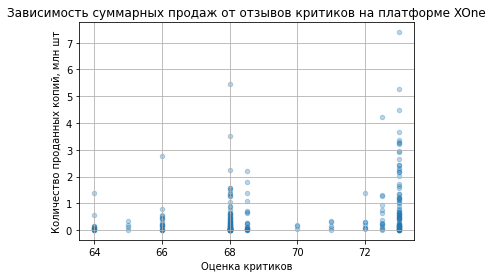

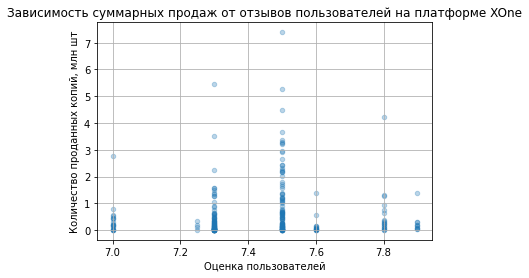

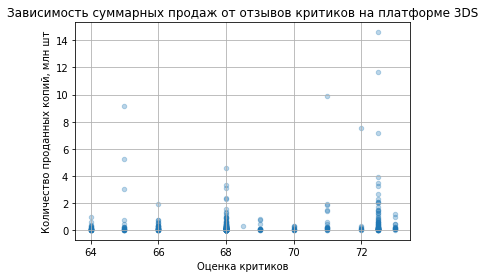

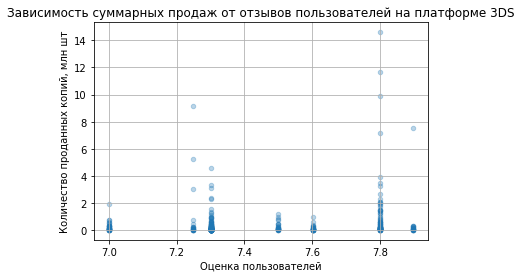

In [39]:
# выносим список потенциально прибыльных платформ в список для удобства
potential_top_platforms = ['PS4', 'XOne', '3DS']

def scatter_for_platform(platform):
    '''
    функция принимает: название платформы
    функция выводит: графики зависимости продаж от отзывов критиков и пользователей на этой платформе
    '''
    # запоминаем данные популярной платформы в отдельную переменную для удобства
    platform_data = actual_data.query('platform == @platform')

    # используем прозрачность 0.3, чтобы показать плотность распределения игр с аналогичными значениями
    ax1 = platform_data.plot(
        x='critic_score', y='all_sales', kind='scatter', grid=True, alpha=0.3
    ).set(
        xlabel='Оценка критиков', 
        ylabel='Количество проданных копий, млн шт', 
        title='Зависимость суммарных продаж от отзывов критиков на платформе '+platform
    )
    ax2 = platform_data.plot(
        x='user_score', y='all_sales', kind='scatter', grid=True, alpha=0.3
    ).set(
        xlabel='Оценка пользователей', 
        ylabel='Количество проданных копий, млн шт', 
        title='Зависимость суммарных продаж от отзывов пользователей на платформе '+platform
    )
    plt.show()
    
# рисуем графики
for platform in potential_top_platforms:
    scatter_for_platform(platform)

Посчитаем корреляцию между отзывами и продажами на выбранных платформах в актуальный период.

In [40]:
for platform in potential_top_platforms:
    # запоминаем данные по платформе для удобства
    platform_data = actual_data.query('platform == @platform')
    print(
        'Корреляция между продажами и оценкой критиков на платформе', platform, ':', 
        platform_data['all_sales'].corr(platform_data['critic_score'])
    )
    print(
        'Корреляция между продажами и оценкой пользователей на платформе', platform, ':', 
        platform_data['all_sales'].corr(platform_data['user_score'])
    )

Корреляция между продажами и оценкой критиков на платформе PS4 : 0.20491816798190124
Корреляция между продажами и оценкой пользователей на платформе PS4 : -0.0076037489951771625
Корреляция между продажами и оценкой критиков на платформе XOne : 0.2957531961670981
Корреляция между продажами и оценкой пользователей на платформе XOne : 0.07639030149460116
Корреляция между продажами и оценкой критиков на платформе 3DS : 0.16017430455793621
Корреляция между продажами и оценкой пользователей на платформе 3DS : 0.15310523719449823


Вывод:
- Корреляция зависимости продаж от отзывов критиков примерно 0.16-0.3. Это означает, что связь роста продаж от роста оценки критиков слабо положительная. При росте оценки критиков, возможно, количество продаж тоже вырастет, но маловероятно.
- Корреляция зависимости продаж от отзывов пользователей примерно 0-0.15. Это означает, что связь роста продаж от роста оценки пользователей очень слабая или отсутствует вовсе. 
- Больше всего копий продается у игр с оценками критиков 68 и 72, или оценками пользователей 7.3, 7.5 или 7.8.
- При этом есть некоторые игры, которые в единичных случаях продавались в аномально большом количестве копий, имея другие оценки. 
- Также стоит помнить, что в большей половине датасета были пропущены и заменены значения в оценках, что могло значительно повлиять на выводы.

### Анализ общего распределения игр по жанрам <a id="games_by_genres">

Построим график распределения количества игр и диаграмму размаха с медианами их продаж по жанрам за актуальный период.

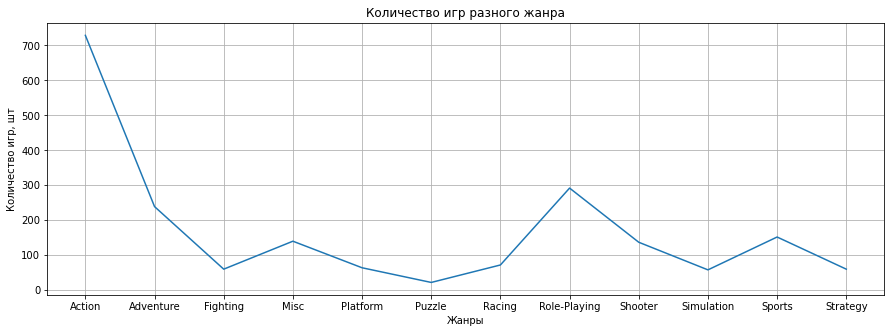

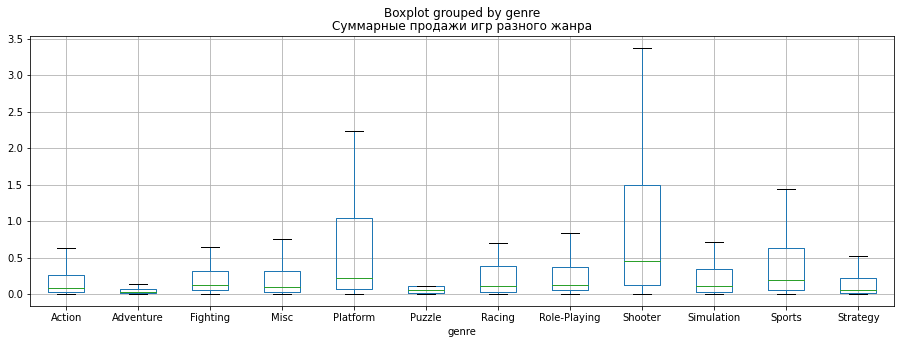

In [41]:
# сбрасываем индексы, чтобы обращаться к данным по названиям столбцов
ax1 = actual_data.pivot_table(index=['genre'], values='name', aggfunc='count').reset_index().plot(
    x='genre',
    y='name',
    grid=True,
    figsize=(15, 5),
    # рисуем график без легенды, так как линия только одна
    legend=False,
    # в xticks передаем список индексов жанров, чтобы они отображались все и в одинаковом порядке на обоих графиках
    xticks=range(len(actual_data['genre'].unique()))
).set(
    xlabel='Жанры', 
    ylabel='Количество игр, шт', 
    title='Количество игр разного жанра'
)

ax2 = actual_data.boxplot(
    # не отображаем выбросы на графике, чтобы удобнее следить за более полезными значениями
    by='genre', column='all_sales', grid=True, figsize=(15, 5), vert=True, showfliers=False
).set(title='Суммарные продажи игр разного жанра')

plt.show()

Вывод:

- Количество выпущенных игр не всегда напрямую влияет на количество суммарных продаж каждой игры на определенной платформе. Например, в жанре `Action` было выпущено больше всего игр (примерно 720 штук), а часто встречающееся количество проданных копий меньше, чем у практически половины других жанров (меньше 60 тысяч копий).
- Больше всего продаж собирают игры в жанре `Shooter`. Часто встречающееся количество проданных копий у них меньше 3.4 млн копий.
- Меньше всего выпущено игр и продается копий в жанре `Puzzle`, примерно 40 игр и часто встречающееся количество проданных копий меньше 15 тысяч.

## Определение портрета пользователя для каждого региона <a id="profile">

### Анализ самых популярных платформ <a id="popular_platforms">

Выведем топ-5 платформ с наибольшими продажами в каждом регионе за актуальный период. Также построим график суммарных продаж игр на каждой платформе для каждого региона. 

,na_sales
platform,
PS4,108.750000
XOne,93.125000
3DS,55.500000
WiiU,38.093750
PC,19.265625


,eu_sales
platform,
PS4,141.125000
XOne,51.593750
3DS,42.843750
PC,38.375000
WiiU,25.125000


,jp_sales
platform,
3DS,87.812500
PSV,21.109375
PS4,15.960938
WiiU,13.007812
PSP,10.710938


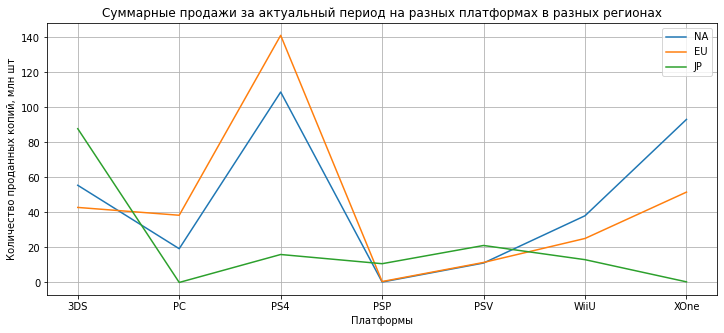

In [42]:
# запоминаем список колонок с регионами для удобства
# также запоминаем название региона для дальнейшего обозначения на графиках
regions = {
    'na_sales': 'NA', 
    'eu_sales': 'EU',
    'jp_sales': 'JP'
}

# собираем график для каждого региона по очереди, так как в единой сводной таблице столбцы с регионами могут перемешаться

# ax присваиваем None, чтобы работал сбор графиков в один (в первый по очереди график ничего не добавится)
ax = None

# добавляем подписи на ось Х
xticks = range(len(actual_data['platform'].unique()))

for region_column in regions.keys():
    # выводим таблицу с топ-5 платформ в регионе
    # сортируем по убыванию
    # добавляем закрашивание цветом с одинаковыми диапазонами цветов, чтобы легче визуально разделять цифры в таблице
    display(
        actual_data.pivot_table(
            index=['platform'], values=region_column, aggfunc='sum'
        ).sort_values(by=region_column, ascending=False).head(5).style.background_gradient(
            cmap='BuGn', vmin=0, vmax=150
        )
    )
    # добавляем данные региона в общий график
    # переименовываем столбец со значениями, чтобы линии на графике отображали название региона
    ax = actual_data.pivot_table(
        index=['platform'], values=region_column, aggfunc='sum'
    ).rename(columns={region_column: regions[region_column]}).plot(
        grid=True, figsize=(12, 5), legend=True, xticks=xticks, ax=ax
    )

# отдельно подписываем график
ax.set(
    xlabel='Платформы', 
    ylabel='Количество проданных копий, млн шт', 
    title='Суммарные продажи за актуальный период на разных платформах в разных регионах'
)
plt.show()

Вывод:

- Наиболее популярные платформы в регионах в актуальный период:
    - `NA`: `PS4`, `XOne`, `3DS`, `WiiU`, `PC`.
    - `EU`: `PS4`, `XOne`, `3DS`, `PC`, `WiiU`.
    - `JP`: `3DS`, `PSV`, `PS4`, `WiiU`, `PSP`.
- Можно отметить, что игры на платформах `PS4`, `3DS`, `WiiU` пользовались популярностью во всех регионах, везде присутствуют в топ-5 суммарных продаж.
- В `NA` и `EU` регионах больше всего продавалось игр на платформе `PS4`. Продано 108.7 и 141.1 млн копий соответственно.
- Чуть меньше в этих регионах продалось игр на платформе `XOne` (93.1 и 51.6 млн копий соответственно).
- Меньше всего в этих регионах продавалось игр на платформе `PSP`. Меньше 1 млн копий.
- В `JP` регионе больше всего продавалось игр на платформе `3DS`. Продано 87.8 млн копий.
- Меньше всего в этом регионе продавалось игр на платформах `PC` и `XOne`. Меньше 1 млн копий.
- Также, судя по графику, общие продажи в регионах `NA` и `EU` примерно одинаковые, и значительно выше, чем в регионе `JP`.

### Анализ самых популярных жанров <a id="popular_genres">

Выведем топ-5 жанров с наибольшими продажами в каждом регионе за актуальный период. Также построим график суммарных продаж игр каждого жанра для каждого региона.

,na_sales
genre,
Action,85.875000
Shooter,77.750000
Role-Playing,47.031250
Sports,38.781250
Platform,20.828125


,eu_sales
genre,
Action,84.125000
Shooter,67.625000
Sports,41.312500
Role-Playing,38.531250
Platform,17.812500


,jp_sales
genre,
Role-Playing,53.937500
Action,37.687500
Misc,11.179688
Simulation,9.671875
Platform,8.546875


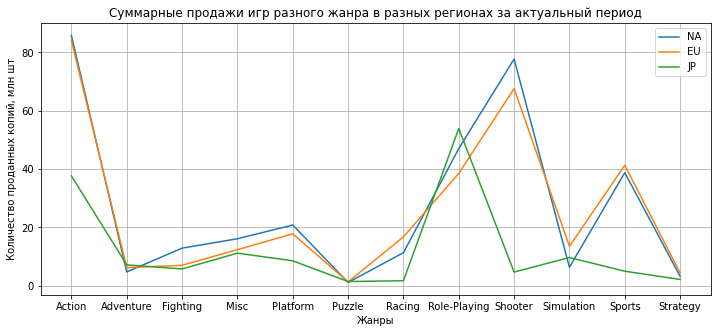

In [43]:
# собираем график для каждого региона по очереди, так как в единой сводной таблице столбцы с регионами могут перемешаться

# ax присваиваем None, чтобы работал сбор графиков в один (в первый по очереди график ничего не добавится)
ax = None

# добавляем подпись по оси Х
xticks = range(len(actual_data['genre'].unique()))

for region_column in regions.keys():
    # выводим таблицу с топ-5 жаниров в регионе
    # сортируем по убыванию
    # добавляем закрашивание цветом с одинаковыми диапазонами цветов, чтобы легче визуально разделять цифры в таблице
    display(
        actual_data.pivot_table(
            index=['genre'], values=region_column, aggfunc='sum'
        ).sort_values(by=region_column, ascending=False).head(5).style.background_gradient(
            cmap='BuGn', vmin=0, vmax=100
        )
    )
    # добавляем данные региона в общий график
    # переименовываем столбец со значениями, чтобы линии на графике отображали название региона
    ax = actual_data.pivot_table(
        index=['genre'], values=region_column, aggfunc='sum'
    ).rename(columns={region_column: regions[region_column]}).plot(
        grid=True, figsize=(12, 5), legend=True, xticks=xticks, ax=ax
    )

# отдельно подписываем график
ax.set(
    xlabel='Жанры', 
    ylabel='Количество проданных копий, млн шт', 
    title='Суммарные продажи игр разного жанра в разных регионах за актуальный период'
)
plt.show()

Вывод:

- Наиболее популярные жанры игр в регионах за актуальный период:
    - `NA`: `Action`, `Shooter`, `Role-Playing`, `Sports`, `Platform`.
    - `EU`: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Platform`.
    - `JP`: `Role-Playing`, `Action`, `Misc`, `Simulation`, `Platform`.
- Можно отметить, что игры жанров `Action`, `Role-Playing`, `Platform` пользовались популярностью во всех регионах, везде присутствуют в топ-5 суммарных продаж.
- В `NA` и `EU` регионах больше всего продавалось игр жанра `Action`. Продано около 85.9 и 84.1 млн копий соответственно.
- Чуть меньше в этих регионах продалось игр жанра `Shooter` (77.7 и 67.6 млн копий соответственно).
- Меньше всего в этих регионах продавалось игр на платформе `PSP`. Меньше 1 млн копий.
- В `JP` регионе больше всего продавалось игр жанра `Role-Playing`. Продано 53.9 млн копий.
- Меньше всего во всех регионах продавалось игр жанра `Puzzle`, по около 2 млн копий. Также в регионе `JP` суммарно мало продаж собрали игры жанров `Racing` и `Strategy` (около 2-3 млн копий).

### Анализ влияния рейтинга ESRB на продажи <a id="sales_by_rating">

Для начала заменим нулевые значения продаж в датасете на пропуски. Чтобы в статистике отображались только игры, которые хотя бы в 1 экземпляре были проданы в анализируемом регионе.

In [44]:
def change_sales(row, region_columns):
    '''
    функция принимает: строку датасета, список столбцов данных регионов и их названий
    функция возвращает: пропуск, если значение было нулевое, или исходное в противном случае
    '''
    for region_column in region_columns:
        if row[region_column] == 0:
            row[region_column] = np.nan
    return row

# собираем отдельный датасет с данными по регионам
# заменяем все нулевые продажи в регионах пустыми значениями, чтобы они не учитывались в статистике
regions_data = actual_data.apply(change_sales, axis=1, region_columns=regions.keys())

Построим гистограммы с количеством выпущенных игр и диаграммы размаха продаж игр с разным рейтингом ESRB в каждом регионе за актуальный период.

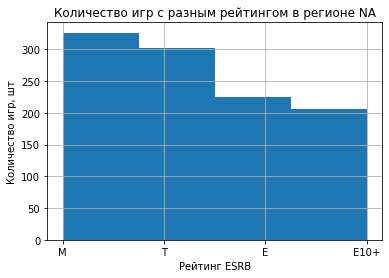

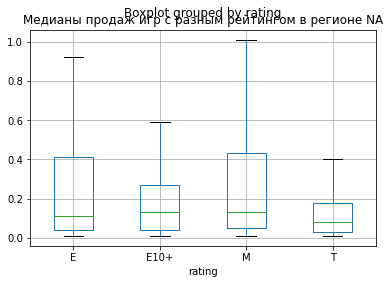

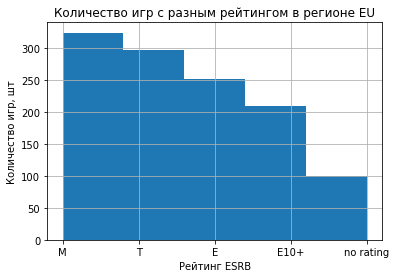

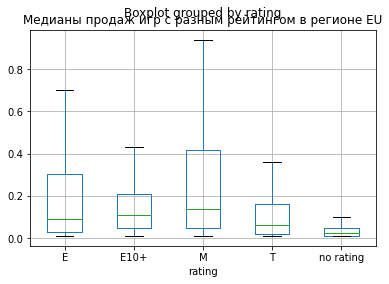

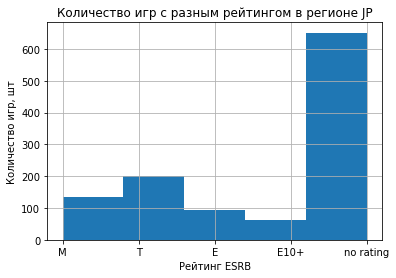

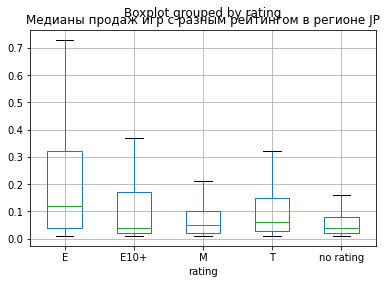

In [45]:
for region_column in regions.keys():
    # выносим данные по региону в отдельный датасет для удобства
    # удаляем все строки с пустыми значениями в датасете региона
    region_data = regions_data.dropna(subset=[region_column])

    # собираем и рисуем графики

    # количество корзин в гистограмме = количество значений рейтинга у анализируемого региона
    ax1 = region_data['rating'].hist(
        bins=len(region_data['rating'].unique()), grid=True
    ).set(
        xlabel='Рейтинг ESRB', 
        ylabel='Количество игр, шт', 
        title='Количество игр с разным рейтингом в регионе '+regions[region_column]
    )
    ax2 = region_data.boxplot(
        # не отображаем выбросы на графике, чтобы удобнее следить за более полезными значениями
        by='rating', column=region_column, grid=True, vert=True, showfliers=False
    ).set(title='Медианы продаж игр с разным рейтингом в регионе '+regions[region_column])
    plt.show()

Вывод:

- В регионах `NA` и `EU` было больше всего выпущено и лучше всего продавались игры с рейтингом `M` (по примерно по 320 шт и часто встречаемое количество продаваемых копий меньше 1 млн и 900 тысяч соответственно). 
- В регионе `NA` хуже всего продавались игры с рейтином `T` (часто встречаемое количество проданных копий меньше 200 тысяч). При этом количество игр с таким рейтингом было выпущено чуть меньше топового рейтинга `M` (примерно 300 шт).
- В регионе `EU` было меньше всего выпущено и хуже всего продавались игры без рейтинга (примерно 100 шт и часто встречаемое количество проданных копий меньше 100 тысяч). Следующий рейтинг с наименьшими продажами игр - `T` (выпущено примерно 300 игр, а копий часто продавалось меньше 180 тысяч).
- В регионе `JP` больше всего было выпущено игр без рейтинга (около 650 шт). При этом такие игры продавались хуже всего (часто встречаемое количество проданный копий меньше 90 тысяч). Следующий рейтинг с наименьшими продажами игр - `M` (выпущено около 140 игр, а копий часто продавалось меньше 100 тысяч).
- Лучше всего в регионе `JP` продавались игры с рейтингом `E`. При почти самом маленьком количестве выпущенных игр (около 100), часто встречаемое количество проданных копий меньше 310 тысяч.

## Проверка гипотез <a id="hypothesis">

### Сравнение пользовательских рейтингов платформ `Xbox One` и `PC` <a id="check_platforms">

Существует предположение, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые. Сформулируем гипотезы для проверки:
- Н0 (нулевая гипотеза): средние пользовательские рейтинги платформ `Xbox One` и `PC` не отличаются.
- Н1 (альтернативная гипотеза): средние оценки пользователей на этих платформах отличаются в любую из сторон (больше или меньше друг друга)

Дополнительная информация для анализа:
- Для сравнения будем использовать использовать t-тест. 
- Уровень критической значимости будем считать равным 5%. 
- Данные используем за актуальный период.

Для начала проверим размер выборок. 

In [46]:
for platform in ['XOne', 'PC']:
    print('Количество игр на платформе', platform, '=', actual_data[actual_data['platform'] == platform]['name'].count())

Количество игр на платформе XOne = 247
Количество игр на платформе PC = 255


Количество игр в обоих выборках примерно одинаковое, поэтому будем сравнивать данные предполагая, что у выборок равная дисперсия. Проверим гипотезу:

In [47]:
alpha = .05 # уровень статистической значимости
results = st.ttest_ind(
    actual_data[actual_data['platform'] == 'XOne']['user_score'], 
    actual_data[actual_data['platform'] == 'PC']['user_score'], 
    equal_var=True
)

print('p-значение:', results.pvalue)

# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 0.0006865107734821852
Отвергаем нулевую гипотезу


Гипотеза не подтвердилась. Cредние пользовательские рейтинги платформ `Xbox One` и `PC` сильно отличаются.

### Сравнение пользовательских рейтингов жанров `Action` и `Sports` <a id="check_genres">

Существует предположение, что пользовательские рейтинги жанров `Action` и `Sports` разные. Сформулируем гипотезы для проверки:
- Н0 (нулевая гипотеза): пользовательские рейтинги жанров `Action` и `Sports` отличаются.
- Н1 (альтернативная гипотеза): оценки пользователей на этих платформах не отличаются.

Проверим размер выборок.

In [48]:
for genre in ['Action', 'Sports']:
    print('Количество игр в жанре', genre, '=', actual_data[actual_data['genre'] == genre]['name'].count())

Количество игр в жанре Action = 729
Количество игр в жанре Sports = 152


Выборки значительно отличаются по размеру, примерно в 5 раз. Поэтому будем сравнивать данные предполагая, что у выборок может быть неравная дисперсия.

In [49]:
results = st.ttest_ind(
    actual_data[actual_data['genre'] == 'Action']['user_score'], 
    actual_data[actual_data['genre'] == 'Sports']['user_score'], 
    equal_var=False
)

print('p-значение:', results.pvalue)

# отвергаем гипотезу только тогда, когда выборочное среднее значимо больше предполагаемого значения
if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 0.0
Не отвергаем нулевую гипотезу


Так как для анализа использовалась вся генеральная совокупность данных, то можно утверждать, что гипотеза может быть подтверждена. Средние пользовательские рейтинги жанров `Action` и `Sports` отличаются. 

## Общий вывод <a id="total">

Общие данные:

- В данных было найдено довольно много пропусков. Большинство из них было заполнено на основе предположений и значений похожих игр.
- Было найдено 2 строки с пустыми названиями и жанрами игр, выпущенных в 1993 на платформе `GEN`. Возможно, стоит разобраться подробнее, в чем могла быть причина потери данных. 
- Строки с незаполненными пропусками в годах выпуска, которые не удалось восстановить, были удалены, их оставалось меньше 1% от всего датасета.
- В столбце с оценками пользователей было проставлено значение `tbd`. Оно было приравнено к пропуску, так как предположительно означает `to be determined` (значения будут объявлены позже).
- Все пропуски в оценках пользователей и критиков были заполнены. Но так как их было доволько много (примерно 51-55% от всего датасета), то данные в дальнейшем анализе могли исказиться. 
- Так как ESRB оценивает игры, которые выпускаются в США и Канаде, то пропущенные значения в играх, которые не продавались в Северной Америке, не были заполнены. 

Анализ годов выпуска и популярности платформ:

- До 1993 года выпускалось крайне мало игр, относительно остальной выборки. Эти данные можно отнести к выбросам.
- Распределение количества игр в разные годы нормальное.
- Большая часть игр была выпущена в 2007-2011 годах. 
- Пики значений в 2008-2009. Было выпщено около 1450 штук в каждый. В 2008 было чуть больше.
- До 2008 года количество игр практически равномерно растет. После 2010 начинается постепенный спад. А в 2012 году заметно резкое падение количества выпускаемых игр, почти в 1.5 раза, по сравнению с предыдущим годом.
- Игры для каждой платформы выпускаются примерно по 9-12 лет. В середине периода (3-7 годы) они пользуются популярностью. Далее количество выпускаемых игр резко уменьшается. По истечению этого срока они теряют популярность вовсе.
- Пик количества выпущенных игр в год присутствует на платформе DS в 2008 году (почти 500 игр).

Анализ потенциально прибыльных платформ в актуальный период:

- За актуальный период были взяты 2012-2016 годы. 
- Также так как было заметно падение спроса на платформы `DS`, `PS3`, `Wii`, `X360`, то они не учитывались в дальнейшем анализе.
- За последние 5 лет игры перестали выпускать на платформах `DS` и `PSP`.
- На платформах `3DS`, `PS3`, `Wii`, `X360` наблюдалось уменьшение количества выпускаемых игр.
- На платформах `PSV` и `WiiU` наблюдалось небольшое увеличение, но после 2015 и 2013 годов соответственно количество выпускаемых игр уменьшается.
- На `PC` до 2013 года наблюдалось падение количества выпускаемых игр. Далее количество растет. Но так как рост незначительный, и количество игр, выпущенных в 2016, меньше, чем количество игр, выпущенных в 2012, то предлагаю не учитывать эту платформу как потенциально прибыльную. Тем более, что в 2016 на `PS4`, `PSV` и `XOne` игр было выпущено больше.
- Как самые потенциально прибыльные платформы можно выделить `PS4` и `XOne`. Они обе появились в 2013 году, и с тех пор показывали рост количества выпускаемых игр. Если учитывать, что платформы в среднем пользуются спросом 9-12 лет, и в 3-7 годы показывают пик количества издаваемых игр, то эти платформы могут еще несколько лет показывать хорошие результаты. Кажется, лучше запустить рекламные кампании для них.
- За последние годы суммарные продажи на всех платформах, кроме `PS4` и `XOne`, падали. На `PS4` и `XOne` продали больше всех копий за последние 3 года.
- Лидер по продажам: `PS4`. За полный 2015 год на нем было продано около 120 млн копий. Что в 2 раза больше, чем на `XOne`.
- Количество копий на лидирующих платформах за 2016 год чуть ниже, чем в 2015. Это может быть связано с тем, что данные за 2016 неполные.
- Суммарное количество продаж подтверждает выбор `PS4` и `XOne` как потенциально прибыльных платформ. В приоритете стоит рассмотреть `PS4`.
- Хуже всего продавались игры на платформах `PSP` и `PSV`. 
- Лучше всего продавались игры на платформе `PS4`. Чуть хуже на платформах `Wii` и `XOne`.

Зависимость продаж от оценок критиков и пользователей:

- Для анализа были взяты потенциально популярные платформы `PS4`, `XOne` и `3DS`.
- Связь роста продаж от роста оценки критиков слабо положительная. При росте оценки критиков, возможно, количество продаж тоже вырастет, но маловероятно.
- Связь роста продаж от роста оценки пользователей очень слабая или отсутствует вовсе.
- Больше всего копий продается у игр с оценками критиков 68 и 72, или оценками пользователей 7.3, 7.5 или 7.8.
- При этом есть некоторые игры, которые в единичных случаях продавались в аномально большом количестве копий, имея другие оценки.
- Также стоит помнить, что в большей половине датасета были пропущены и заменены значения в оценках, что могло значительно повлиять на выводы.

Анализ распределения игр по жанрам:

- Количество выпущенных игр не всегда напрямую влияет на количество суммарных продаж каждой игры на определенной платформе. Например, в жанре `Action` было выпущено больше всего игр, а часто встречающееся количество проданных копий меньше, чем у практически половины других жанров.
- Больше всего продаж собирают игры в жанре `Shooter`.
- Меньше всего выпущено игр и продается копий в жанре `Puzzle`.

Портреты пользователей в регионах:

- Наиболее популярные платформы в регионах в актуальный период:
    - `NA`: `PS4`, `XOne`, `3DS`, `WiiU`, `PC`.
    - `EU`: `PS4`, `XOne`, `3DS`, `PC`, `WiiU`.
    - `JP`: `3DS`, `PSV`, `PS4`, `WiiU`, `PSP`.
- Можно отметить, что игры на платформах `PS4`, `3DS`, `WiiU` пользовались популярностью во всех регионах, везде присутствуют в топ-5 медиан продаж.
- В `NA` и `EU` регионах больше всего продавалось игр на платформе `PS4`. Чуть меньше в этих регионах продалось игр на платформе `XOne`. Меньше всего в этих регионах продавалось игр на платформе `PSP`.
- В `JP` регионе больше всего продавалось игр на платформе `3DS`. Меньше всего в этом регионе продавалось игр на платформах `PC` и `XOne`.
- Также можно отметить, что общие продажи в регионах `NA` и `EU` примерно одинаковые, и значительно выше, чем в регионе `JP`.
- Наиболее популярные жанры игр в регионах за актуальный период:
    - `NA`: `Action`, `Shooter`, `Role-Playing`, `Sports`, `Platform`.
    - `EU`: `Action`, `Shooter`, `Sports`, `Role-Playing`, `Platform`.
    - `JP`: `Role-Playing`, `Action`, `Misc`, `Simulation`, `Platform`.
- Можно отметить, что игры жанров `Action`, `Role-Playing`, `Platform` пользовались популярностью во всех регионах, везде присутствуют в топ-5 суммарных продаж.
- В `NA` и `EU` регионах больше всего продавалось игр жанра `Action`. Чуть меньше в этих регионах продалось игр жанра `Shooter`. Меньше всего в этих регионах продавалось игр на платформе `PSP`.
- В `JP` регионе больше всего продавалось игр жанра `Role-Playing`.
- Меньше всего во всех регионах продавалось игр жанра `Puzzle`. Также в регионе `JP` суммарно мало продаж собрали игры жанров `Racing` и `Strategy`.
- В регионах `NA` и `EU` было больше всего выпущено и лучше всего продавались игры с рейтингом `M`.
- В регионе `NA` хуже всего продавались игры с рейтином `T`.
- В регионе `EU` было меньше всего выпущено и хуже всего продавались игры без рейтинга. Следующий рейтинг с наименьшими продажами игр - `T`.
- В регионе `JP` больше всего было выпущено игр без рейтинга. При этом такие игры продавались хуже всего. Следующий рейтинг с наименьшими продажами игр - `M`.
- Лучше всего в регионе `JP` продавались игры с рейтингом `E`.

Проверка гипотез:
- Cредние пользовательские рейтинги платформ `Xbox One` и `PC` не равны.
- Средние пользовательские рейтинги жанров `Action` и `Sports` отличаются. 